### Accessing Canvas API Click Activity
Authored by Fernando Rodriguez<br>
Last updated Oct 29, 2018

This script obtains students' daily and hourly click counts from the Canvas learning management platform using the Canvas API Library.<br>
https://canvasapi.readthedocs.io/en/latest


<br>
## Step 1 - Import Libraries

In [1]:
from canvasapi import Canvas
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import csv
import re
from scipy import stats

/Users/fernanr1/anaconda/lib/python2.7/site-packages/scipy/_lib/_numpy_compat.py:10: DeprecationWarning: Importing from numpy.testing.nosetester is deprecated, import from numpy.testing instead.
  from numpy.testing.nosetester import import_nose
/Users/fernanr1/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:12: DeprecationWarning: Importing from numpy.testing.decorators is deprecated, import from numpy.testing instead.
  from numpy.testing.decorators import setastest


<br><br>
## Step 2 - Access Canvas API

In order to access a course's Canvas API, you need an API key.

Please visit the following page for instruction on how to obtain Canvas API keys.<br>
https://community.canvaslms.com/docs/DOC-10806-4214724194

In [2]:
# Canvas API URL
API_URL = "https://canvas.instructure.com/"
# Canvas API key
API_KEY = "###ENTER_API_KEY_HERE###" # <- This is where you put in the API key. Enclose the key in '' or ""
# Initialize a new Canvas object
canvas = Canvas(API_URL, API_KEY)

<br>
#### Use the .get_course method to Access Specific Course

In [3]:
# You need to enter Canvas Course ID in the argument
course = canvas.get_course(1160937) # <- 1160937 is the Canvas course ID for this example

#### Use .name method to get course name

In [4]:
course.name

u'SSII 17 Chem 1C:  5 week'

#### Access Instructor(s) and TA(s) names

In [5]:
staff_list = ['teacher', 'ta', 'designer']

staff_users = course.get_users(enrollment_type = staff_list)

In [ ]:
for user in staff_users:
    print (user)

#### Access Student Names and IDs

In [6]:
student_users = course.get_users(enrollment_type = ['student'])

In [ ]:
for user in student_users:
    print (user)

#### Saving User Names and IDs in Seperate Lists

In [7]:
# splitting up user ids

user_list = []
user_name = []

student_users = course.get_users(enrollment_type = ['student'])
print student_users

for user in student_users:
    userstr = str(user)
    userid_split_id = userstr.split('(', 1)[1].split(')')[0]
    userid_split_name = userstr.split(' (')[0]
    user_list.append(userid_split_id)
    user_name.append(userid_split_name)

<PaginatedList of type User>


Check the first 10 user names

In [ ]:
user_name[0:10]

Get total number of students in the course

In [8]:
user_list[0:10]
len(user_list)

247

<br><br>
## Step 3 - Access Student Page Views

In [ ]:
# checking that one of the student's clicks matches the dataframe
# The id for this student is '6294748', which is entered into the get_user_in_a_course_level_participation_data argument
sampledata = course.get_user_in_a_course_level_participation_data(6294748) # <- individual studentid
sampledata # yes, it checks out

<br>
### Obtaining Page Views for All Students

The script below may take 5-20 minutes to run, depending on the number of students and the length of the course. 


In [11]:
pg_list = []

for user in user_list:
    views = course.get_user_in_a_course_level_participation_data(user)
    pageviews = views['page_views']
    
    pg_list.append(pageviews)

<br>
### Coverting page views into a dataframe

Note that Canvas records the first ever page view for the course. Therefore, the date-time may start much earlier than the start of the course. Likewise, Canvas also records the last page view for the course, so the last date-time may be much later than the last day of the course. 

In [12]:
df_pgviews = pd.DataFrame(pg_list)
df_pgviews[0:10] # <- accessing the first 10 rows of the dataframe
# Note that the NaN values means the students did not have any clicks for that particular day or time

,2017-05-25T11:00:00-06:00,2017-05-27T16:00:00-06:00,2017-05-29T14:00:00-06:00,2017-05-29T23:00:00-06:00,2017-05-30T13:00:00-06:00,2017-06-01T12:00:00-06:00,2017-06-01T19:00:00-06:00,2017-06-03T16:00:00-06:00,2017-06-04T14:00:00-06:00,2017-06-05T12:00:00-06:00,...,2018-07-17T00:00:00-06:00,2018-07-17T23:00:00-06:00,2018-07-19T16:00:00-06:00,2018-07-19T17:00:00-06:00,2018-07-19T19:00:00-06:00,2018-07-19T21:00:00-06:00,2018-07-26T17:00:00-06:00,2018-08-15T21:00:00-06:00,2018-09-05T21:00:00-06:00,2018-09-06T22:00:00-06:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Saving to .csv file (no identifiers)

In [13]:
df_pgviews.to_csv('Page Views - NO IDS.csv')

### Adding identifiers to dataframe

In [14]:
# making user id into daframe so I can concatinate it 
userids = pd.DataFrame(user_list)
userids.columns = ["studentid"]

# making user name into dataframe for the same purposes
usernames = pd.DataFrame(user_name)
usernames.columns = ["name_firstlast"]

# duplicate names dataframe. This will id students with the same name
duplicatenames = []
duplicatenames = usernames.duplicated(keep = False)
duplicate_names = pd.DataFrame(duplicatenames)
duplicate_names.columns = ["duplicate_names"]

In [15]:
# concatinating all dataframes
df_pageviews_full = pd.concat([df_pgviews, userids, usernames, duplicate_names], axis = 1)

In [16]:
# the identifiers are the final three columms
df_pageviews_full[0:10]

,2017-05-25T11:00:00-06:00,2017-05-27T16:00:00-06:00,2017-05-29T14:00:00-06:00,2017-05-29T23:00:00-06:00,2017-05-30T13:00:00-06:00,2017-06-01T12:00:00-06:00,2017-06-01T19:00:00-06:00,2017-06-03T16:00:00-06:00,2017-06-04T14:00:00-06:00,2017-06-05T12:00:00-06:00,...,2018-07-19T17:00:00-06:00,2018-07-19T19:00:00-06:00,2018-07-19T21:00:00-06:00,2018-07-26T17:00:00-06:00,2018-08-15T21:00:00-06:00,2018-09-05T21:00:00-06:00,2018-09-06T22:00:00-06:00,studentid,name_firstlast,duplicate_names
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6294748,Mary Abouakl,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7061495,Anton Abucejo,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5638750,Rahmeh Abushanab,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7977278,Shirleen Achieng,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6494500,Joshua Adams,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8118810,Daniel Aghekyan,False
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7984068,Mykela Agojo,False
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6294211,Francis Dave Aguilar,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6975984,Sanam Ahadi,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7975868,Sarah Alkhatib,True


#### Saving to .csv file (with identifiers)

In [21]:
df_pageviews_full.to_csv('Page Views with IDs.csv')

<br>
### Subsetting Data by Course Start and End Dates

The start date to Friday, August 4th (The weekend before the start of the course). The end date is Friday, September 14th (the last day of finals week).

I first extract the date-time colums to a list.

In [18]:
# extrating colums
columns = df_pageviews_full.columns
columns

Index([u'2017-05-25T11:00:00-06:00', u'2017-05-27T16:00:00-06:00',
       u'2017-05-29T14:00:00-06:00', u'2017-05-29T23:00:00-06:00',
       u'2017-05-30T13:00:00-06:00', u'2017-06-01T12:00:00-06:00',
       u'2017-06-01T19:00:00-06:00', u'2017-06-03T16:00:00-06:00',
       u'2017-06-04T14:00:00-06:00', u'2017-06-05T12:00:00-06:00',
       ...
       u'2018-07-19T17:00:00-06:00', u'2018-07-19T19:00:00-06:00',
       u'2018-07-19T21:00:00-06:00', u'2018-07-26T17:00:00-06:00',
       u'2018-08-15T21:00:00-06:00', u'2018-09-05T21:00:00-06:00',
       u'2018-09-06T22:00:00-06:00',                 u'studentid',
                  u'name_firstlast',           u'duplicate_names'],
      dtype='object', length=1671)

In [19]:
type(columns) # checking type

pandas.core.indexes.base.Index

<br>
Using the .loc method, I then slice the data to those start and end dates.

In [20]:
df_pageviews_ss = df_pageviews_full.loc[:, '2017-08-04T00:00:00-06:00' : '2017-09-15T00:00:00-06:00']
df_pageviews_ss[0:10]

,2017-08-04T00:00:00-06:00,2017-08-04T01:00:00-06:00,2017-08-04T02:00:00-06:00,2017-08-04T03:00:00-06:00,2017-08-04T04:00:00-06:00,2017-08-04T09:00:00-06:00,2017-08-04T10:00:00-06:00,2017-08-04T11:00:00-06:00,2017-08-04T12:00:00-06:00,2017-08-04T13:00:00-06:00,...,2017-09-14T12:00:00-06:00,2017-09-14T13:00:00-06:00,2017-09-14T16:00:00-06:00,2017-09-14T17:00:00-06:00,2017-09-14T18:00:00-06:00,2017-09-14T20:00:00-06:00,2017-09-14T21:00:00-06:00,2017-09-14T22:00:00-06:00,2017-09-14T23:00:00-06:00,2017-09-15T00:00:00-06:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,8.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br><br>
## Step 4 - Visualizing/Checking Click Activities
Using matplotlib, you can obtain a plot of click activites for every student across time.


In [25]:
# First, convert the pandas dataframe into a numpy array
all_nclicks = df_pgviews.as_matrix()
print type(all_nclicks)

<type 'numpy.ndarray'>


/Users/fernanr1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [26]:
all_nclicks = np.nan_to_num(all_nclicks)
all_nclicks.shape

(247, 1668)

### Obtaining All Clicks Per Day/Hour

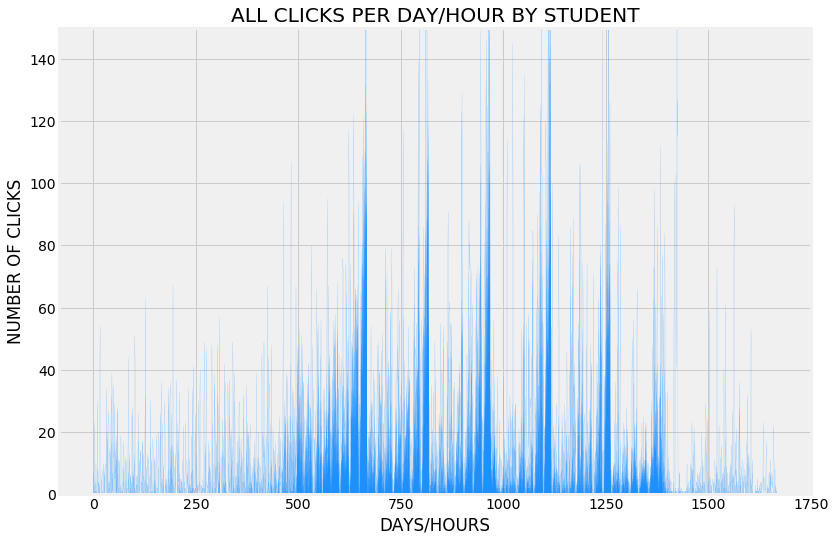

In [27]:
# Line graph of all clicks by student
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8),  facecolor = "w")
plt.ylim(0, 150)
plt.title("ALL CLICKS PER DAY/HOUR BY STUDENT")
plt.xlabel('DAYS/HOURS')
plt.ylabel('NUMBER OF CLICKS')
for i in all_nclicks:
    plt.plot(i, linewidth = .1, color = 'dodgerblue')
fig


### Obtaining Average Clicks Per Day/Hour

In [28]:
avg_nclicks = np.mean(all_nclicks, axis=0)
avg_nclicks
avg_nclicks.shape

(1668,)

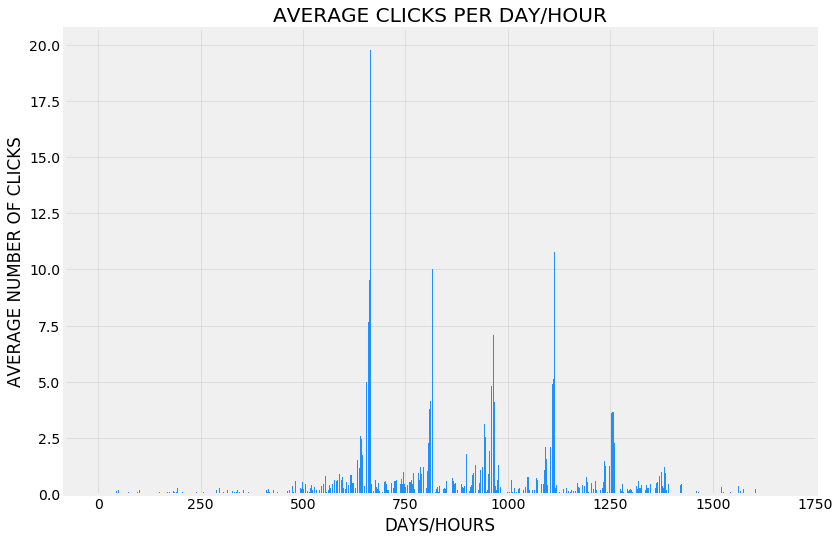

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 8),  facecolor = "w")
plt.bar(range(len(avg_nclicks)), avg_nclicks, figure=fig, width = .75, color = 'dodgerblue')
plt.title("AVERAGE CLICKS PER DAY/HOUR")
plt.xlabel('DAYS/HOURS')
plt.ylabel('AVERAGE NUMBER OF CLICKS')
plt.grid(alpha=0.5)
fig
